# CSCI 2000U Final Project
- Mohammad Mushfequr Rahman (Email: mohammadmushfequr.rahman@uoit.net)
- Terry Darmawan Hosea (Email: terry.hosea@uoit.net)



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("2015.csv")

<br>
# Dataset title: World Happiness (2015.csv) 
- The main goal of this analysis is to further understand what directly affects a country's happiness level. 
-  We specifically chose this dataset to analyze because this dataset contains the information of each country and factors that might affect the happiness of its citizen. It is personally intriguing to us because this dataset deals with data on a global scale.
<h3>To open dataset click <a href="https://www.kaggle.com/unsdsn/world-happiness#2015.csv"> here</a></h3>


# Shape of Data
> 158 rows × 12 columns

# Columns
>- Country
- Region
- Happiness Rank
- Happiness Score
- Standard Error
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
- Dystopia Residual

In [3]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<br><br>

In [4]:
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


<br><br>
<h3>We will first attempt to create a scatter graphs subplot of Happiness Scores and
the factors from column Economy GDP per capita to Generosity to see which factors 
provide a positive and negative correlation </h3>

     r: 0.78097            r: 0.74061            r: 0.7242            r: 0.56821            r: 0.3952            r: 0.18032       

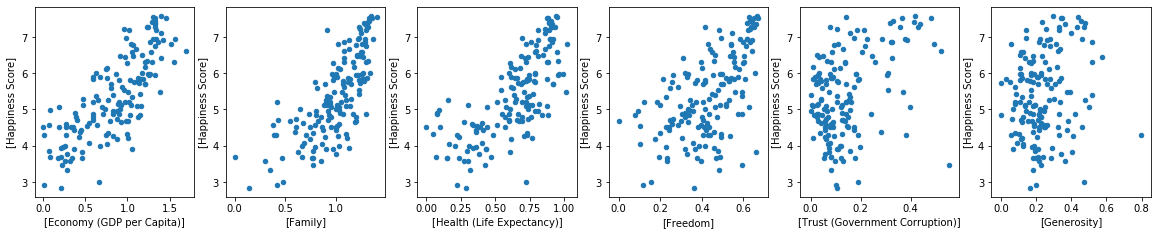

In [5]:
for x in data.columns[5:-1]:
    print("     r:",round(np.corrcoef(data[data.columns[3]],data[x])[1,0],5), end ="       ")
fig,axes= pl.subplots(1,len(data.columns.values)-6,figsize=(20,3.5))
for i,col in enumerate(data.columns.values[5:-1]):
    data.plot(x=[col],y=[data.columns[3]],kind="scatter",ax=axes[i])
pl.show()


    

<h4>As we can see, there is an acceptable positive correlations between happiness score
and the columns:</h4>

1. GDP per Capita
2. Family
3. Health (Life Expectancy)
4. Freedom

<h4>We will do further data analysis using the before mentioned factors to help use determine
which factor have a strong positive impact on happiness.</h4>
<br><br>

<h3> After determining the factors, we can also see from the first 10 datas that it is dominated by countries mostly from Western Europe followed by Australia & New Zealand <br><br></h3>

<h4>To further prove that, let us plot the mean of each of the region's happiness score
</h4>


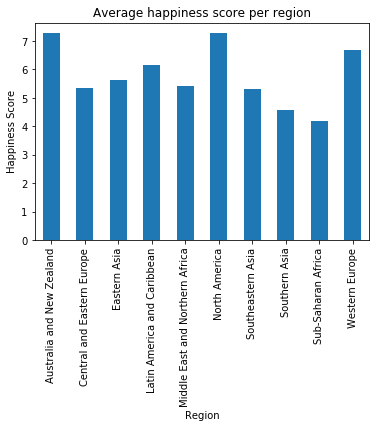

In [6]:
region_happiness = data.groupby('Region')['Happiness Score']
region_happiness.mean().plot.bar();
pl.title("Average happiness score per region")
pl.ylabel('Happiness Score');

It seems like a country's happiness score is also affected by the region it is in
<br><br>

<br>
# Hypothesis one: 
> After seeing the above charts, we are going to assume that a country's average
happiness score is significantly affected by the region it is in and its GDP per capita. We will try to prove 
our assumption by carrying out more tests between these two variable.


<h4>From the subplots we can see that there is mediocre positive correlation between the GDP per capita and
the Happiness of a country, with a pearson's correlation coefficent of 0.78097
To further prove our Hypothesis one:</h4>
- We will next plot a bar chart of the regions and the average GDP of the region.
- Create a scatter plot of mean happiness score and mean GDP per capita by region

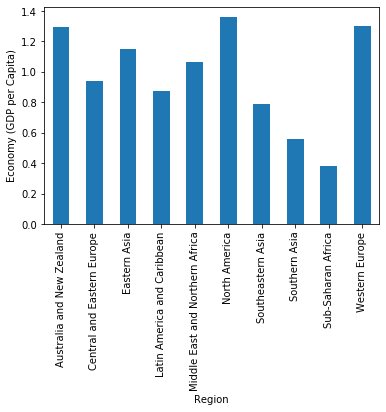

In [7]:
region_GDP = data.groupby('Region')['Economy (GDP per Capita)']
region_GDP.mean().plot.bar();
pl.ylabel('Economy (GDP per Capita)');


Correlation coefficient:  0.89898


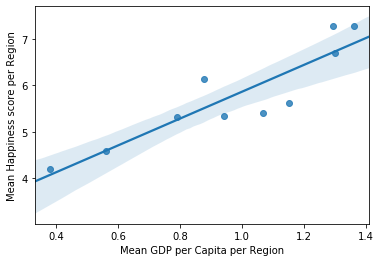

In [8]:
print("Correlation coefficient: " ,round(np.corrcoef(region_GDP.mean(), region_happiness.mean())[0,1],5))
sns.regplot(region_GDP.mean(), region_happiness.mean())
#pl.scatter(region_GDP.mean(), region_happiness.mean());
pl.xlabel("Mean GDP per Capita per Region");
pl.ylabel("Mean Happiness score per Region");


<h4>Now we will be exploring the relationship between freedom and region </h4>

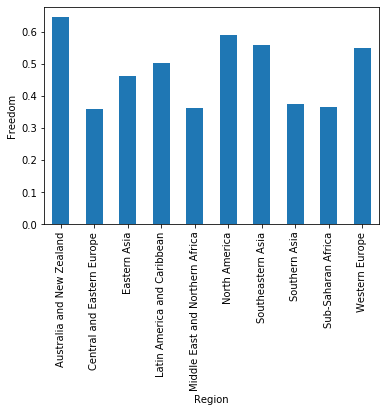

In [9]:
region_freedom=data.groupby('Region')[data.columns[8]]
region_freedom.mean().plot.bar();
pl.ylabel('Freedom');


<h4>As we can see from the graphs above, the regions </h4>

- Australia and New Zealand
- North America
- SouthEastern Asia
- Western Europe

<h4>have the highest freedom, alongdside this 3 out of 4 regions happen to also have the highest 
GDP per Capita, and Happiness Scores</h4>


<br><br>
<h4>Now we will see the comparison between Regions and Health (Life Expectancy) </h4>

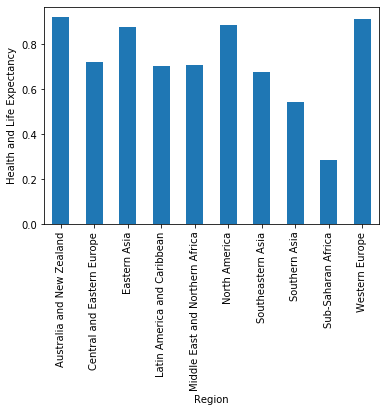

In [10]:
region_expectancy=data.groupby("Region")[data.columns[7]]
region_expectancy.mean().plot.bar();
pl.ylabel('Health and Life Expectancy');

<h4>As we can see, Health and Life Expectancy are high in the following regions:</h4>

1. Australia and New Zealand
2. North America
3. Eastern Asia
4. Western Europe

<h4>This time we also see the same three countries having the same with Health and Life Expectancy
</h4>

<br><br>
<h4>Now we will see the comparison between Region and families</h4>

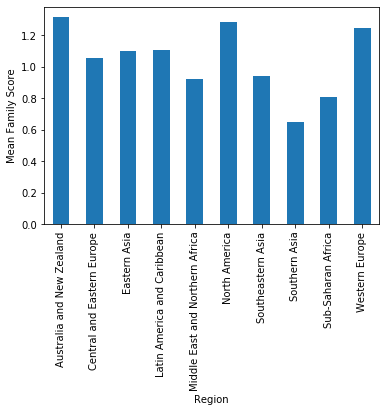

In [11]:
region_family=data.groupby("Region")[data.columns[6]]
region_family.mean().plot.bar()
pl.ylabel("Mean Family Score")
pl.show()

<h4>As we can see the same three regions have a strong postive family contribution.</h4>
<br><br>

# Conclusion
The conclusion that we can draw from the above data analysis is that the mean happiness of someone is greatly affected by the Region they live in.

More than anything else, if you live in Australia and New Zealand, North America or 
Western Europe, you are more likely to be happiest with a combination of factors such 
as:

1. Freedom
2. GDP per Capita
3. Health
4. Family


Although other regions have high score in these categories, you need a combination of 
these factor to be able to be happy.
<br><br><br>

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


<br><br>

<h4>In order to refine our analysis, we are going to implement a regression modeling using the random forest regressor from
sklearn. In this section: </h4>
> - We will build random forests using factors that we have identified as important. 
- We will also use the random forest to determine which values have the greatest impact on the Happiness Score.
<br>

Section for Random forest model building using the data set that we have
1. Covert regions to dummy variables

In [13]:

train=data.set_index("Country")
train = pd.get_dummies(train,prefix='Region')
train.head()



,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
Country,,,,,,,,,,,,,,,,,,,,
Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0,1
Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0,1
Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0,1
Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0,1
Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,1,0,0,0,0


<br><br>
In the next cell, we are dropping the Happiness Score from the training data set and store in a variable called labels. 
This label will be used to train the random forest so the random forest can identify if it is taking steps in the
right direction or not. 

In [14]:
labels=np.array(train["Happiness Score"])
train=train.drop(["Happiness Score"],1)
train=train.drop(["Happiness Rank"],1)
features_name=list(train.columns)
train=np.array(train)

<br><br>
In this cell, we use the train_test_split api from sklearn to split our labels and trasining datasets 
into different section to build and test our random forest model.

In [15]:
train_features, test_features, train_labels, test_labels = train_test_split(train, labels, test_size = 0.25, random_state = 42)

In [16]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (118, 18)
Training Labels Shape: (118,)
Testing Features Shape: (40, 18)
Testing Labels Shape: (40,)


In [17]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [18]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


In [19]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.87 %.


<br><br>
<h4> Below we can see the graph output from the test data<?h4>

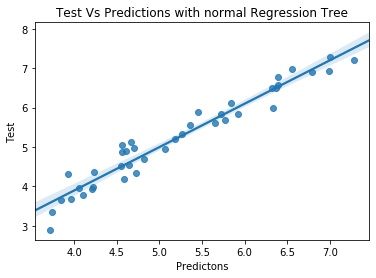

In [20]:
sns.regplot(predictions,test_labels).set_title("Test Vs Predictions with normal Regression Tree");
pl.xlabel("Predictons");
pl.ylabel("Test");


In [21]:
# New random forest with the regions
rf_region = RandomForestRegressor(n_estimators= 1000, random_state=42)
'''
'Region_Australia and New Zealand', 'Region_Central and Eastern Europe', 'Region_Eastern Asia', 
'Region_Latin America and Caribbean', 'Region_Middle East and Northern Africa', 'Region_North America', 
'Region_Southeastern Asia', 'Region_Southern Asia', 'Region_Sub-Saharan Africa', 'Region_Western Europe'
'''
region_indices = [features_name.index('Region_Australia and New Zealand'), 
                     features_name.index('Region_Central and Eastern Europe'),
                    features_name.index('Region_Eastern Asia'),
                     features_name.index('Region_Latin America and Caribbean'),
                     features_name.index('Region_Middle East and Northern Africa'),
                    features_name.index('Region_North America'),
                     features_name.index('Region_Southeastern Asia'),
                    features_name.index('Region_Southern Asia'),
                    features_name.index('Region_Sub-Saharan Africa'),
                    features_name.index('Region_Western Europe')]
train_region = train_features[:, region_indices]
test_region = test_features[:, region_indices]
# Train the random forest
rf_region.fit(train_region, train_labels)
# Make predictions and determine the error
predictions = rf_region.predict(test_region)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.6 degrees.
Accuracy: 87.66 %.


Correlation strength of Test and Predictions with Regions Regression Tree: 0.7962900532493316


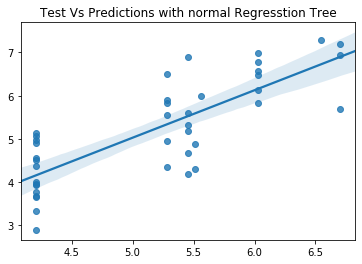

In [22]:
sns.regplot(predictions,test_labels).set_title("Test Vs Predictions with normal Regresstion Tree");
print("Correlation strength of Test and Predictions with Regions Regression Tree:",np.corrcoef(predictions,test_labels)[1,0])

In [23]:
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_name, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Economy (GDP per Capita) Importance: 0.4
Variable: Family               Importance: 0.16
Variable: Health (Life Expectancy) Importance: 0.16
Variable: Dystopia Residual    Importance: 0.15
Variable: Freedom              Importance: 0.06
Variable: Trust (Government Corruption) Importance: 0.03
Variable: Standard Error       Importance: 0.02
Variable: Generosity           Importance: 0.01
Variable: Region_Latin America and Caribbean Importance: 0.01
Variable: Region_Australia and New Zealand Importance: 0.0
Variable: Region_Central and Eastern Europe Importance: 0.0
Variable: Region_Eastern Asia  Importance: 0.0
Variable: Region_Middle East and Northern Africa Importance: 0.0
Variable: Region_North America Importance: 0.0
Variable: Region_Southeastern Asia Importance: 0.0
Variable: Region_Southern Asia Importance: 0.0
Variable: Region_Sub-Saharan Africa Importance: 0.0
Variable: Region_Western Europe Importance: 0.0


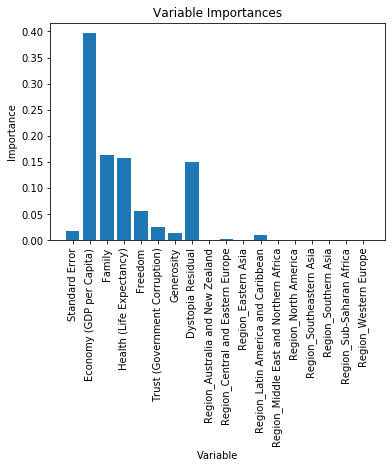

In [24]:
x_values = list(range(len(importances)))
# Make a bar chart
pl.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
pl.xticks(x_values, features_name, rotation='vertical')
# Axis labels and title
pl.ylabel('Importance'); pl.xlabel('Variable'); pl.title('Variable Importances');


# Conclusions we can draw from the random forest regressor:

Using the data that we have gathered from Random Forest Regressor, we have learned new 
things about the our original observations using the original data analysis.

1. The Greatest Factor that affects Happiness Score is GDP per capita,
2. Our origial assumption which claimed that Regions were the greatest factor in Happiness was actually disporved which is seen in the Variable importance Graph
3. Although the importance of the Regions werent deemed high, if we still train a 
model with the Regions as the factors, we still get an accuracy of 87.66% and a 
correlation of 0.796 between predicted and testing variables, 

4. Most suprising factor of all is that from the Features importance graph that we
    have,we can see the Economy is the greatest motivator of happiness while Freedom
    and Corruption perception arent that important which leads us to conclude that even
    a corrupt country can have a very happy population as long as GDP per Capita
    is high enough.
5. Whoever said money can't buy happiness should have looked at this analysis before
    making that assumption.

# How this analysis can help the world:

Using this analysis of world happiness, People could determine what factors are important
to have the highest percieved happiness. Countries and leaders could determine what factors
should be taken into consideration when making decisons.

**For example:**
> The Canadian Federal Government is in a dilemma regarding the Trans American pipeline
 which is a major pipeline from Canada to the United States and generates a large amount
    of income i.e GDP for the Canadians. At the same time the First Nations tribes 
    claim that the Trans Mountain pipeline violates their rights to their sovereign land i.e 
    their freedom. Using the Conclusions that we have found in our data analysis the Canadian
    federal government can easily come to the conclusion with a very high confidence that 
    if The Trans Mountain pipeline makes enough money, they can easily subvert the freedom of the First Nations people 
    and still keep a majority of its citizens as happy or even happier and they are less likey to be voted
    out during elections

In [26]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [27]:
data = pd.read_csv('2015.csv')

In [28]:
data1 = dict(
           type='choropleth',
           locations=data['Country'],
           locationmode='country names',
            z= data['Happiness Score'],
           text=data['Happiness Rank'],
           colorbar={'title':'Happiness Score'},
            colorscale='Rainbow',
            reversescale=False
)

layout = dict(title='2015 World Happiness Score',
             geo=dict(showframe = False,
                      projection = {'type': 'equirectangular'}))

choro = go.Figure([data1], layout)
iplot(choro)